In [1]:
import torch
import torch.optim as optim

from utils.models.model import NET
from utils.dataset import DatasetPhone
from utils.tools import find_lr

from torch.utils.data import DataLoader
from torch.utils.data import random_split

In [2]:
path = 'find_phone_data/data'
batch_size = 2
learning_rate = 3e-4
validation_split = 0.2  
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
model = NET(channels_in=3, channels=32, num_classes=2)  
model.to(device)

NET(
  (conv1): VggBlock(
    (convolution): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (batch_norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (down_conv1): DownSampling(
    (batch_norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
    (convolution): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  )
  (conv2): DoubleResnet(
    (conv1): ResnetV2Shake(
      (blockA): ShakeBlock(
        (conv1): BnActConv(
          (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): ReLU()
          (conv): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        )
        (conv2): BnActConv(
          (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): ReLU()
          (conv): Conv2d(128, 128, kerne

In [4]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [5]:
dataset = DatasetPhone(path) 
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [7]:
lg_lr, losses = find_lr(model, optimizer, loader, 1e-4)

cost:0.1913, lr: 0.0001
cost:0.1906, lr: 0.0001
cost:0.2544, lr: 0.0001
cost:0.0416, lr: 0.0002
cost:0.0872, lr: 0.0002
cost:0.0227, lr: 0.0002
cost:0.0825, lr: 0.0002
cost:0.0085, lr: 0.0003
cost:0.1419, lr: 0.0003
cost:0.1260, lr: 0.0004
cost:0.2819, lr: 0.0005
cost:0.0804, lr: 0.0005
cost:0.2171, lr: 0.0006
cost:0.2173, lr: 0.0007
cost:0.0678, lr: 0.0008
cost:0.0937, lr: 0.0010
cost:0.3220, lr: 0.0011
cost:0.2217, lr: 0.0013
cost:0.1985, lr: 0.0015
cost:0.2140, lr: 0.0018
cost:0.2493, lr: 0.0020
cost:0.1633, lr: 0.0024
cost:0.1030, lr: 0.0028
cost:0.0626, lr: 0.0032
cost:0.2039, lr: 0.0037
cost:0.1260, lr: 0.0044
cost:0.4566, lr: 0.0051
cost:0.2263, lr: 0.0059
cost:0.2727, lr: 0.0069
cost:0.2103, lr: 0.0080
cost:0.2500, lr: 0.0093
cost:0.3473, lr: 0.0108
cost:0.2039, lr: 0.0125
cost:0.5282, lr: 0.0146
cost:0.2383, lr: 0.0170
cost:0.3428, lr: 0.0197
cost:0.1525, lr: 0.0229
cost:0.3331, lr: 0.0267
cost:0.4508, lr: 0.0310
cost:0.1405, lr: 0.0361
cost:0.4036, lr: 0.0420
cost:0.2759, lr:

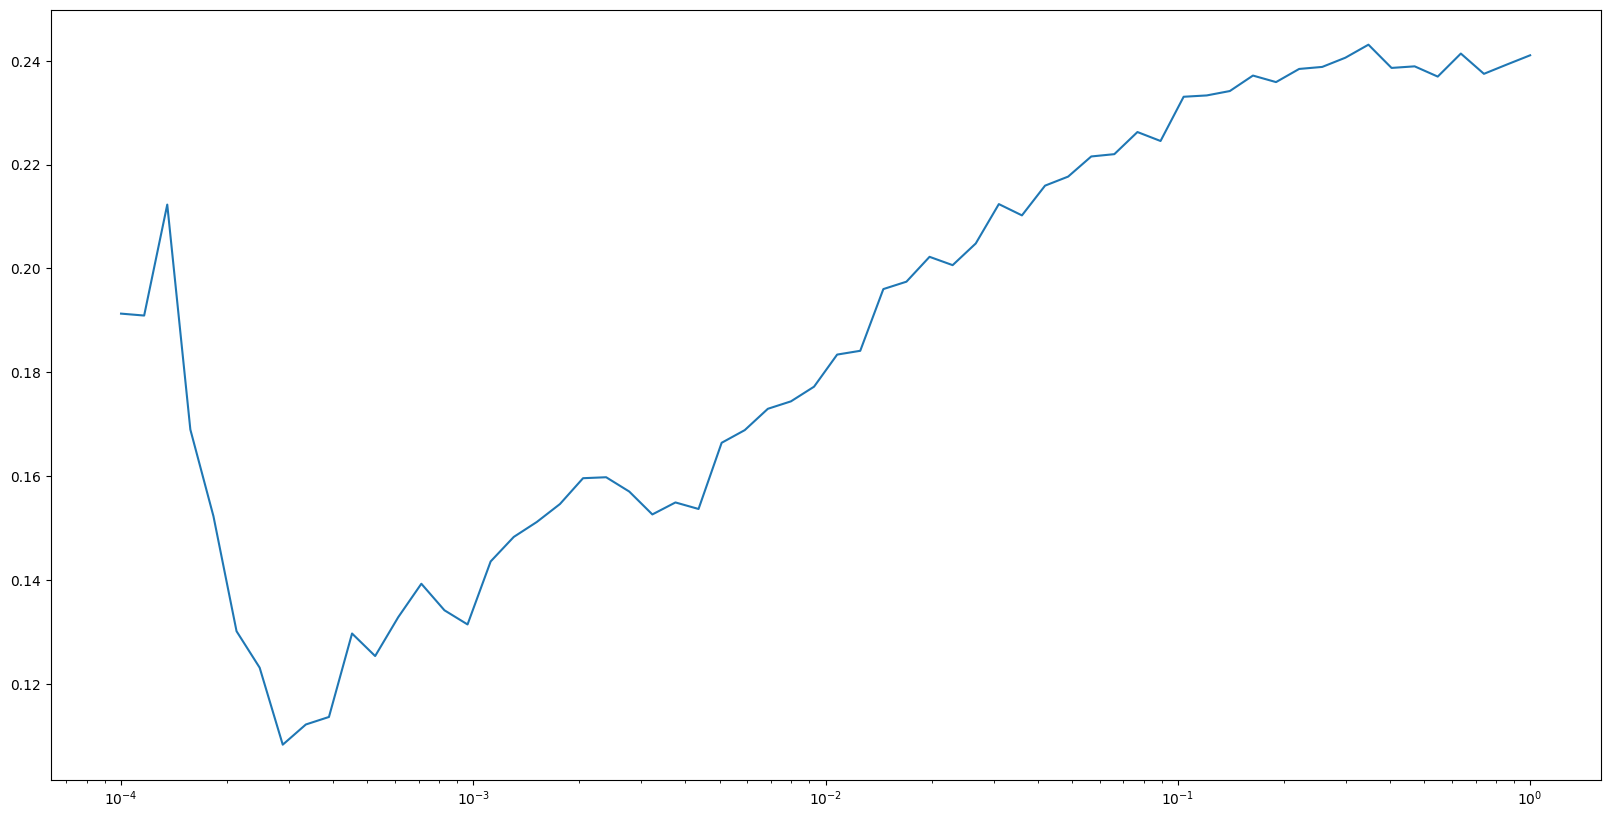

In [8]:
import matplotlib.pyplot as plt

# plot loss vs learning rate
f1, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(lg_lr, losses)
ax1.set_xscale('log')
plt.show()